<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-equivalent-of-multiple-regression" data-toc-modified-id="Bayesian-estimation-equivalent-of-multiple-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation equivalent of multiple regression</a></span><ul class="toc-item"><li><span><a href="#The-classic-simple-regression" data-toc-modified-id="The-classic-simple-regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The classic simple regression</a></span></li></ul></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bayesian inference</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span><ul class="toc-item"><li><span><a href="#Study-Description" data-toc-modified-id="Study-Description-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Study Description</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Import data</a></span></li></ul></li><li><span><a href="#Plots-for-Exploratory-Data-analysis" data-toc-modified-id="Plots-for-Exploratory-Data-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plots for Exploratory Data analysis</a></span></li><li><span><a href="#\begin{align*}
y_i-&amp;\sim-Normal(\mu_i,-\sigma)-
\\-\mu_i-&amp;=-\beta_0-+-\beta_1x-+-\beta_2x
\\-\beta_0-&amp;\sim-uniform(0,-1)
\\-\beta_1-&amp;\sim-normal(0,-1)
\\-\beta_2-&amp;\sim-normal(0,-1)
\\-\sigma-&amp;\sim-halfcauchy(0,-100)-
\end{align*}" data-toc-modified-id="\begin{align*}
y_i-&amp;\sim-Normal(\mu_i,-\sigma)-
\\-\mu_i-&amp;=-\beta_0-+-\beta_1x-+-\beta_2x
\\-\beta_0-&amp;\sim-uniform(0,-1)
\\-\beta_1-&amp;\sim-normal(0,-1)
\\-\beta_2-&amp;\sim-normal(0,-1)
\\-\sigma-&amp;\sim-halfcauchy(0,-100)-
\end{align*}-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><div class="MathJax_Display MathJax_Processing"></div><script type="math/tex; mode=display" id="MathJax-Element-2">\begin{align*}
y_i &\sim Normal(\mu_i, \sigma) 
\\ \mu_i &= \beta_0 + \beta_1x + \beta_2x
\\ \beta_0 &\sim uniform(0, 1)
\\ \beta_1 &\sim normal(0, 1)
\\ \beta_2 &\sim normal(0, 1)
\\ \sigma &\sim halfcauchy(0, 100) 
\end{align*}</script></a></span></li><li><span><a href="#Post-model-fit-visualisations---Bayesian-simple-regression" data-toc-modified-id="Post-model-fit-visualisations---Bayesian-simple-regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Post model fit-visualisations - Bayesian simple regression</a></span><ul class="toc-item"><li><span><a href="#Posterior-distribution-plots" data-toc-modified-id="Posterior-distribution-plots-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Posterior distribution plots</a></span></li><li><span><a href="#Posterior--autocorrelation-plots" data-toc-modified-id="Posterior--autocorrelation-plots-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Posterior  autocorrelation plots</a></span></li></ul></li><li><span><a href="#Posterior-trace-plots" data-toc-modified-id="Posterior-trace-plots-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Posterior trace plots</a></span></li><li><span><a href="#Step-5---Posterior-predictive-checks" data-toc-modified-id="Step-5---Posterior-predictive-checks-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Step 5 - Posterior predictive checks</a></span></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [8]:
# Import relevant packages for analysis below.
%matplotlib inline
import pystan as ps
import patsy as pt
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt

In [9]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation equivalent of multiple regression

The data above is taken from the multiple regression tutorial from Trinity open stats lab https://sites.trinity.edu/osl/data-sets-and-activities/regression-activities, for the original article from Atir, S., Rosenzweig, E., & Dunning, D. (2015). When knowledge knows no bounds: Self-perceived expertise predicts claims of impossible knowledge. Psychological Science, 26, 1295-1303.

## The classic simple regression

# Bayesian inference
<font size = "3"> Following the quick description of the classic Z-test above its important to keep in mind that Bayesian analysis inference are all derived from the application of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to the classic simple regression, it is fundamentally different, becuase its uses fully probabilistic modelling and the infernce is not based on sampling distributions</font>
    
<font size = "1"> For a fuller description see the Practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. In the case of scientific research publication is the goal, as such the priors must be accepted by a skeptical audience. Much of this can be achieved using prior predcitve checks to acsetain os the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then interprete and the posterior

5. Conduct model checks. i.e. Posterior predcitive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> 

#  Step 1 - Identify the relevant data for question under investigation

## Study Description

The background for the data analysed below, is that experts play an ever increasing role in a ever increasing complex society with focused specialisation of said experts. A supposed phenomenen is that experts may be over convinced of their capabilities and no more than they actually do and are vulnerable to illsuionary thoughts. All resulting in overclaiming.(e.g. claiming impossible things.

Atir, Rosenzweig and Dunning (2015) study took 202 people and exposed them to a overclaiming task. Partipants completed a overclaiming task and self percieved knowledge questionaire.

## Import data

In [13]:
url = "https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/Data/Atir%20Rosenzweig%20Dunning%202015.csv"

#Read in csv of the data from Atir, S., Rosenzweig, E., & Dunning, D. (2015).
df = pd.read_csv(url)

df.head()

,id,order_of_tasks,self_perceived_knowledge,overclaiming_proportion,accuracy,FINRA_score
0,1,1,5.5,0.444444,0.250000,4
1,7,1,4.5,0.555556,0.194444,4
2,10,1,3.5,0.166667,0.347222,5
3,12,1,6.0,0.722222,-0.055556,4
4,14,1,2.5,0.388889,0.166667,3


# Plots for Exploratory Data analysis

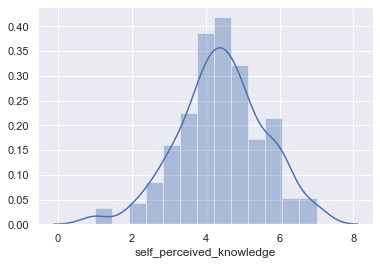

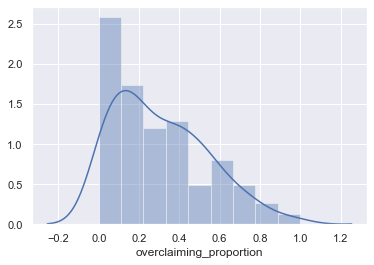

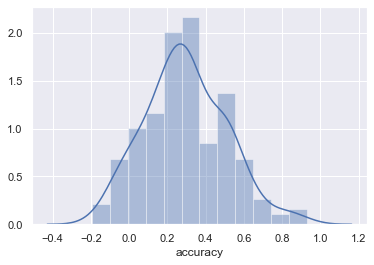

In [35]:
# Histograms
# Self percieved knowledge
sns.distplot(df["self_perceived_knowledge"])
plt.show()

sns.distplot(df["overclaiming_proportion"])
plt.show()

sns.distplot(df["accuracy"])
plt.show()

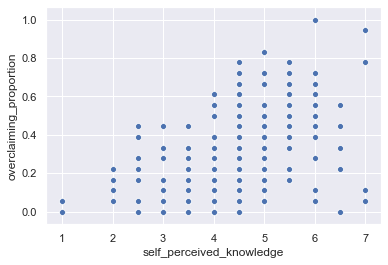

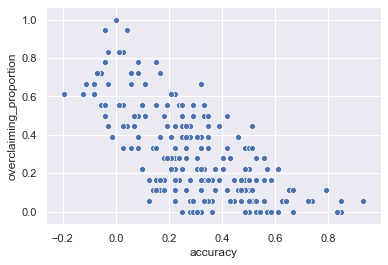

In [32]:
# Scatteplots
sns.scatterplot(x = "self_perceived_knowledge" , y = "overclaiming_proportion" , data=df)
plot_1.set(xlabel='Self Percieved Knowledge', ylabel='Overclaiming')
plt.show()

sns.scatterplot(x = "accuracy" , y = "overclaiming_proportion" , data=df)
plot_1.set(xlabel='Accuracy', ylabel='Overclaiming')
plt.show()


# \begin{align*}
y_i &\sim Normal(\mu_i, \sigma) 
\\ \mu_i &= \beta_0 + \beta_1x + \beta_2x
\\ \beta_0 &\sim uniform(0, 1)
\\ \beta_1 &\sim normal(0, 1)
\\ \beta_2 &\sim normal(0, 1)
\\ \sigma &\sim halfcauchy(0, 100) 
\end{align*} 

In [58]:
# Stan model for conducting multiple regression

Multiple_Regression = """
data {
  int<lower=0> N;   // Sample size
  int<lower=0> K;   // Number of predictor variables
  matrix[N, K] x;   // Predictor variables (IV) matrix
  vector<lower = 0, upper = 1>[N] y;      // Vector of Dependent variable (DV) values
}
parameters {           
  vector[K] beta;       // Coefficients for predictors
  real<lower=0> sigma;  // Standard deviation
}
model {

//priors
beta[1] ~ uniform(0,1); 

for (i in 2:K){
beta[i] ~ normal(0,1);
}
sigma ~ cauchy(0,1);

// likelihood
  y ~ normal(x * beta, sigma);  
}

generated quantities {

real yrep[N];
yrep = normal_rng(x * beta, sigma);

}
"""

In [59]:
#Code below compiled the Stan mdoel specified above.
sm = ps.StanModel(model_code = Multiple_Regression)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3301ad8766cd5468fcb139ee08422432 NOW.


In [60]:
#Genrate design matrix for the regression analysis for use in the stan model above
x = pt.dmatrix(" ~ self_perceived_knowledge + accuracy ", data = df)
x = np.asarray(x)

# Generating a python dictionary for passing to the stan model specifiesd above.
data = {
    # Sepcifies te number of data points.
    'N': len(df),  
    # Takes te number of columns in the array (matrix) of the predcitor values generated above.
        'K': x.shape[1],
    # Specifies the predcitor (IV) values for use in the Stan model above.
        'x': x,
    # Dv values for the regression model 
        'y': df["overclaiming_proportion"]
}

In [61]:
#Fiting model to the complied stan model above with 4 chains 
fit = sm.sampling(data= data, iter=2000, chains=4 , seed= 302675)

In [64]:
# Because of python print statement it is easier to extract the results and to use panda data frame for result presentation
summary = fit.summary()
fit_df = pd.DataFrame(summary['summary'], 
                  columns = summary['summary_colnames'], 
                  index = summary['summary_rownames'])

In [65]:
fit_df.head()

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
beta[1],0.090422,0.000848,0.035974,0.019327,0.065456,0.090275,0.115760,0.160968,1798.166624,1.000947
beta[2],0.099434,0.000178,0.007568,0.084899,0.094070,0.099406,0.104764,0.114210,1811.528643,1.001161
beta[3],-0.753435,0.000821,0.042398,-0.837909,-0.781456,-0.752585,-0.726282,-0.667282,2666.895607,0.999786
sigma,0.127522,0.000121,0.006351,0.115693,0.123099,0.127291,0.131690,0.140397,2764.300460,1.002097
yrep[1],0.448599,0.001985,0.128813,0.194281,0.361829,0.448095,0.535470,0.697334,4210.495771,1.000107


# Post model fit-visualisations - Bayesian simple regression

## Posterior distribution plots

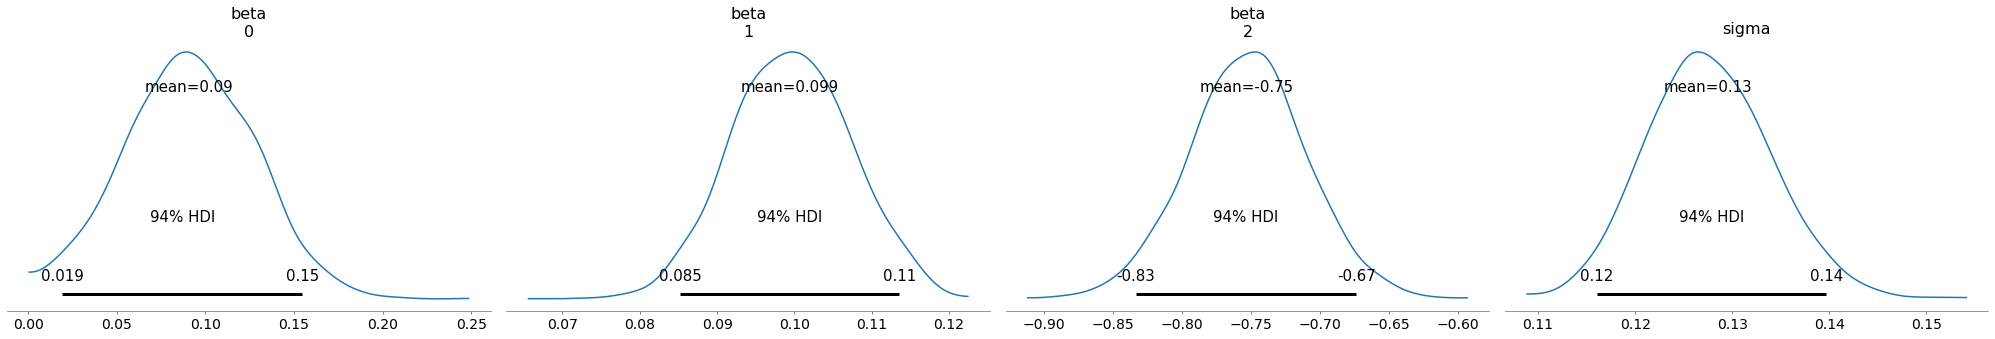

In [66]:
az.plot_posterior(fit, var_names=("beta", "sigma"));

## Posterior  autocorrelation plots

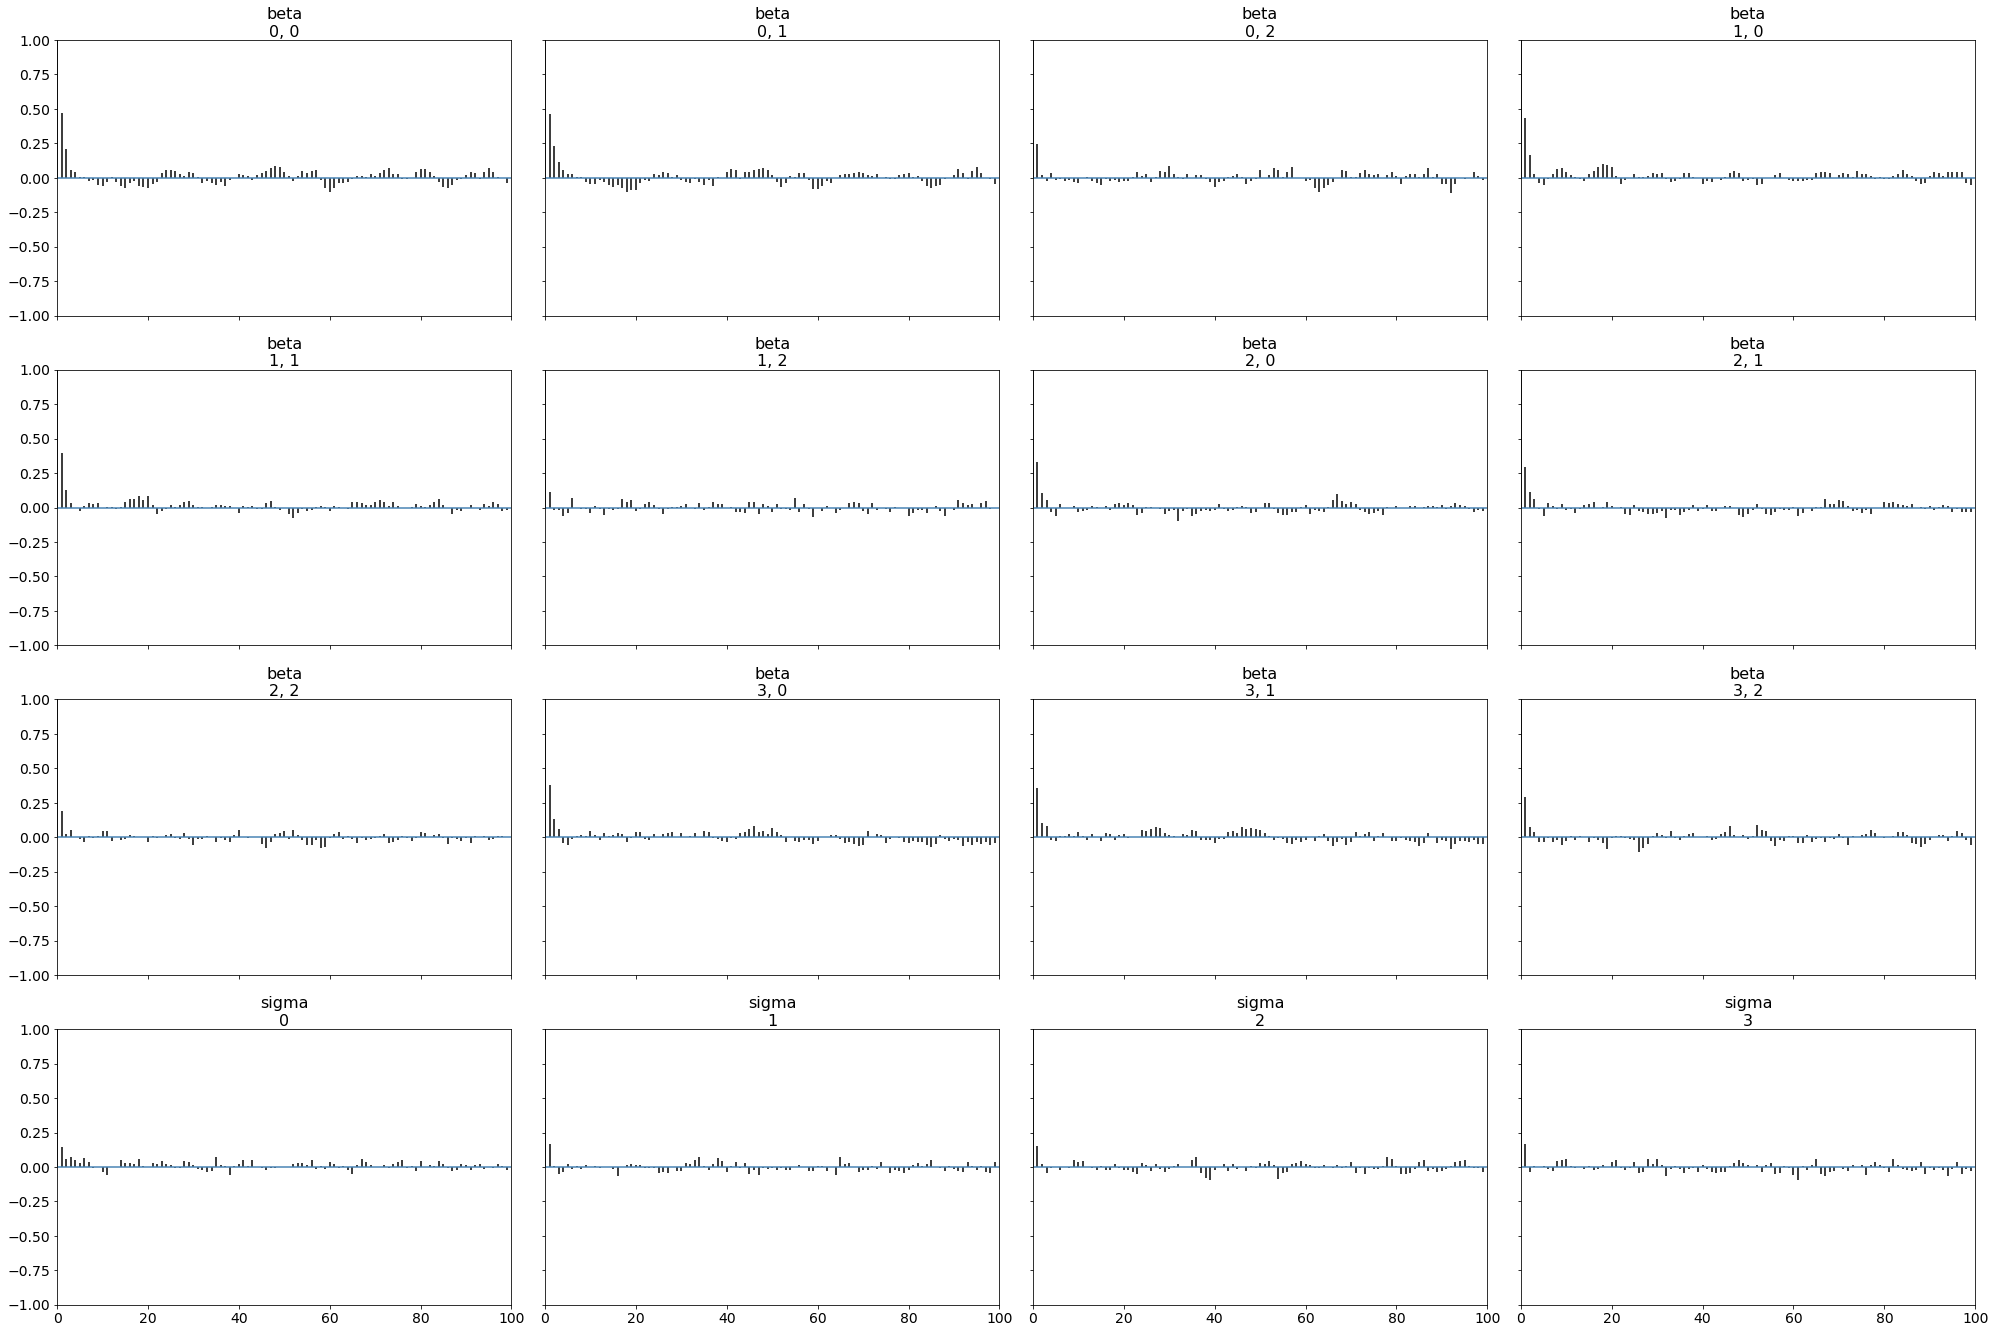

In [67]:
az.plot_autocorr(fit,var_names=("beta", "sigma"));

# Posterior trace plots 

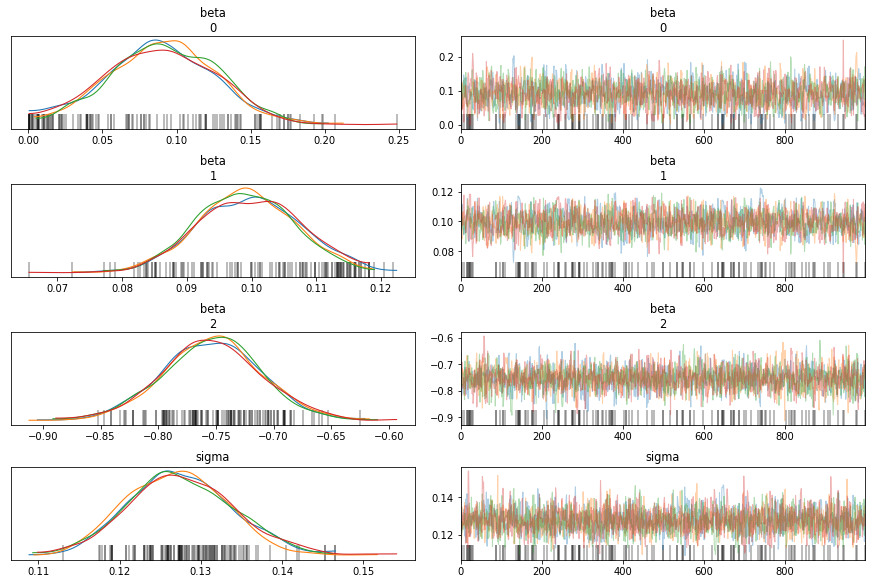

In [69]:
az.plot_trace(fit, var_names=("beta", "sigma"));

# Step 5 - Posterior predictive checks

In [53]:
#First take a random sample of the posterior parameter estimates for plotting
posterior_samples = pd.DataFrame(fit.extract(pars = ['beta[1]','beta[2]', 'beta[3]', 'sigma']))

In [70]:
#Convert pystan fit object to IO for Arviz functions.
data = az.from_pystan(
                posterior=fit,
                posterior_predictive='yrep',
                observed_data=["y"])

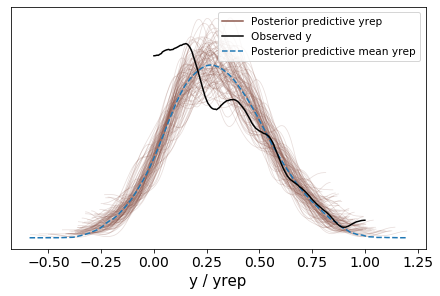

In [71]:
# Plot posterior simulated data sets for posterior predictive check
az.plot_ppc(data, data_pairs = {"y" : "yrep"}, num_pp_samples= 100);

# References

Atir, S., Rosenzweig, E., & Dunning, D. (2015). When knowledge knows no bounds: Self-perceived expertise predicts claims of impossible knowledge. Psychological Science, 26, 1295-1303.

Gabry, J., Simpson, D., Vehtari, A., Betancourt, M., & Gelman, A. (2019). Visualization in Bayesian workflow. Journal of the Royal Statistical Society: Series A (Statistics in Society), 182(2), 389-402.
    
Kruschke, J. (2015). Doing Bayesian data analysis: A tutorial with R, JAGS and Stan. Oxford, England: Academic Press.    
    
McElreath, R. (2020). Statistical rethinking: A Bayesian course with examples in R and Stan.Boca Raton: CRC Press.